In [1]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

# Beispieldaten: Normalverteil und keine Verteilung

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sys

print 'Python Version ' + sys.version
print 'Numpy Version ' + np.__version__
print 'Matplotlib Version ' + plt.__version__
print 'Pandas Version ' + pd.__version__

import networkx as nx
import matplotlib.pyplot as plt
import graphviz as gv
%matplotlib inline

Python Version 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy Version 1.9.2
Matplotlib Version 1.4.3
Pandas Version 0.16.2


In [3]:
# Funktionen werden hinzugeladen.
%run Parameter.ipynb

In [4]:
# Produkte
products = Product(40)

# Ressourcen 
resources = Resource(20)

#Kapazität
capacities = Capacity(resources)
for h in resources[1:]:
    capacities[h] = 1

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
index = 0
for j in range(1, len(products), 2):
    consumtions[j][1+index] = 1
    consumtions[j+1][1+index] = 1
    index = index + 1
del index


# Erträge
revenues = Revenue(products)
for j in range(1, len(products), 2):
    revenues[j] = 100
    revenues[j+1] = 1000

# Buchungsperioden
times = Time(5*(len(resources)-1))

# Normalverteilung
from scipy.stats import norm

# Wahrscheinlichkeiten
probs = Prob(products, times)
t1 = 101
t2 = 96
for j in range(1, len(products), 2):
    probs[j][t2:t1] = norm.pdf(np.arange(5), 3, 1)
    probs[j+1][t2:t1] = norm.pdf(np.arange(5), 3, 1)
    t1 = t2
    t2 = t2 - 5
del t1, t2

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Systemzustände (ohne Lagerhaltung)
# conditions = Condition(capacities, resources, times)

<function matplotlib.pyplot.show>

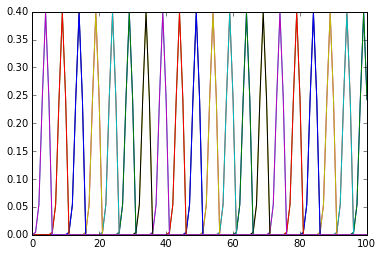

In [5]:
plt.plot(probs[1:].T)
plt.show

inkl. Lagerhaltung

In [ ]:
#Lagerbestand
stock_resources = Stock_Resource(resources)
stock_resources[1] = 0

max_stock_resources = Max_Stock_Resource(resources)
max_stock_resources[1] = 1
max_stock_resources[2] = 1

# Systemzustände
condition_storages = Condition_Storage(capacities, resources, max_stock_resources, times)
# Bei der Modelformulierung mit Lagerproduktion wird der Parameter 'max_stocks' benötigt.

In [6]:
from DynamicProgramm_Stock import DP_Stock, Structure_Stock, Opt_Politic_Stock

ImportError: No module named DynamicProgramm_Stock

In [192]:
solutions={}

DP_Stock(solutions, condition_storages, products, resources, capacities, consumtions, times, revenues, probs, stock_resources, max_stock_resources)

c[h]: [1 1] - y[h]: [0 0] - t: 1 - V(c,y,t): 1020.0 - d[0]: [0] - d[j]: [0 0 1 1] - j*: 4 - OC[j*]: 5000.0
c[h]: [1 0] - y[h]: [0 0] - t: 1 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1] - y[h]: [0 0] - t: 2 - V(c,y,t): 1816.0 - d[0]: [0] - d[j]: [0 0 0 1] - j*: 4 - OC[j*]: 5000.0
c[h]: [1 0] - y[h]: [0 0] - t: 2 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1] - y[h]: [0 0] - t: 3 - V(c,y,t): 2453.0 - d[0]: [0] - d[j]: [0 0 0 1] - j*: 4 - OC[j*]: 5000.0
c[h]: [1 0] - y[h]: [0 0] - t: 3 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1] - y[h]: [0 0] - t: 4 - V(c,y,t): 2962.5 - d[0]: [0] - d[j]: [0 0 0 1] - j*: 4 - OC[j*]: 5000.0
c[h]: [1 0] - y[h]: [0 0] - t: 4 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1] - y[h]: [0 0] - t: 5 - V(c,y,t): 3370.0 - d[0]: [0] - d[j]: [0 0 0 1] - j*: 4 - OC[j*]: 5000.0
c[h]: [0 1] - y[h]: [0 0] - t: 1 - V(c,y,t): 1020.0 - d[0]: [0] - d[j

8528.4502

In [193]:
graph = Structure_Stock(solutions, condition_storages, products, resources, consumtions, revenues, probs, stock_resources, max_stock_resources)

In [194]:
Opt_Politic_Stock(solutions, resources, stock_resources, products)

,$c^{1}$,$c^{2}$,$y^{1}$,$y^{2}$,$t$,ExpValue,$d_{0}$,$d_{1}$,$d_{2}$,$d_{3}$,$d_{4}$
43,1,1,0,0,10,8528.450195,0,0,1,0,1
86,1,0,0,0,9,4245.925293,1,3,1,0,0
130,0,1,0,0,9,4332.250000,0,0,0,0,1
42,1,1,0,0,9,8021.450195,0,0,1,0,1
119,0,1,0,1,9,7161.750000,0,0,0,0,1
129,0,1,0,0,8,4165.375000,0,0,0,0,1
162,0,0,0,1,8,4165.375000,0,0,0,0,2
41,1,1,0,0,8,7331.450195,0,0,1,0,1
118,0,1,0,1,8,6661.000000,0,0,0,0,1
173,0,0,0,0,8,0.000000,0,0,0,0,0
